In [1]:
cd

/Users/jjobes


In [2]:
cd /Users/jjobes/Desktop/relax_challenge

/Users/jjobes/Desktop/relax_challenge


In [3]:
# import data from local folder

import pandas as pd

df = pd.read_csv('takehome_user_engagement.csv')

In [4]:
df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [5]:
df['time_stamp'].sort_values()

178140    2012-05-31 08:20:06
59486     2012-05-31 15:47:36
175638    2012-05-31 17:19:37
26821     2012-05-31 21:58:33
109716    2012-06-01 00:17:30
                 ...         
84316     2014-06-04 23:32:13
162633    2014-06-04 23:34:04
168409    2014-06-04 23:46:31
6053      2014-06-04 23:56:26
70763     2014-06-06 14:58:50
Name: time_stamp, Length: 207917, dtype: object

In [6]:
# total users = 12,000

# total logins = 207,918

# Define which users are active users

In [7]:
# force time_stamp dtype on column

df['time_stamp'] = pd.to_datetime(df.time_stamp)

In [8]:
# define function which isolates adopted_users

from pandas import DataFrame, Series

def adopted_users(period, days_logged, user):

    visited = len(user.index) # number of times the user logged in
    i, count = 0, 1
    adopted_user = False

    while count < days_logged:
        if (i+2) < visited: # needs to be at least 3 entries left
            if (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) <= pd.Timedelta(days=period) and (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) > pd.Timedelta(days=1):
                count += 1 # logged in twice within a 7 day period
                new_timeframe = pd.Timedelta(days=7) - ((user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]))
                if (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) <= new_timeframe and (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) > pd.Timedelta(days=1):
                    adopted_user = True # they logged in three times within a 7 period window
                    count += 1
                else: 
                    i += 1
                    count = 1
            else:
                i += 1
                count = 1
        else:
            count = days_logged
    return adopted_user

In [9]:
adopted_df = df.groupby('user_id').filter(lambda x: (len(x) > 2) & (adopted_users(period=7, days_logged=3, user=x) ==True))

In [10]:
# Now we can create our labels with these unique users that logged in 3 times or more within 7 days
adopted_users = adopted_df.user_id.unique()
len(adopted_users)

1493

In [11]:
# with adopted users identified, we can understand which attributes correlate to them

# 1493 out of 12,000 are adopted users (~12%)

# Load user information

In [12]:
user_df = pd.read_csv('takehome_users.csv', encoding ='latin1')
print(user_df.shape)
user_df.head()

(12000, 10)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
# make column in user dataframe for adapted users

user_df['adopted_user'] = user_df.object_id.isin(adopted_users)

In [14]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


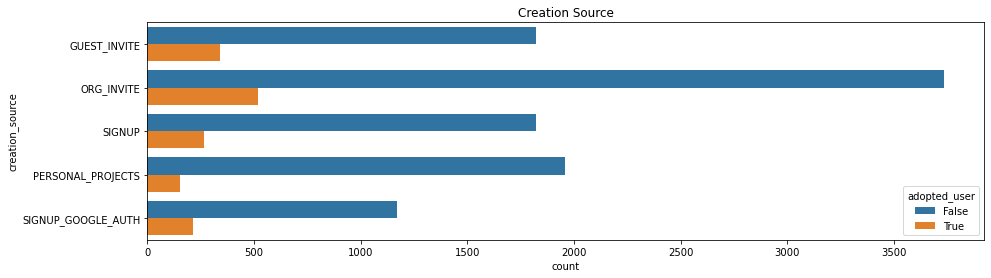

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="creation_source", hue='adopted_user', data=user_df).set_title('Creation Source');

In [16]:
# most adopted users are original invite but the success rate is very low vs other avenues

# guess invite has the best success rate

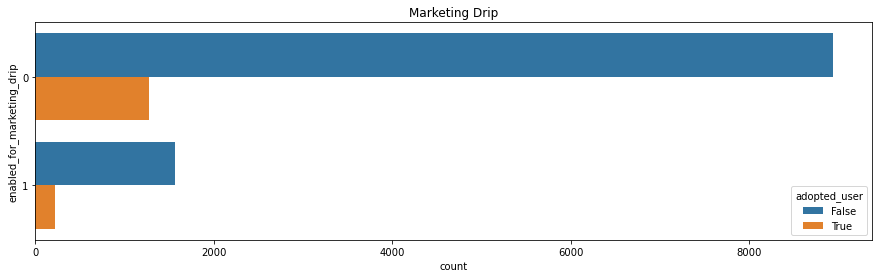

In [17]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="enabled_for_marketing_drip", hue='adopted_user', data=user_df).set_title('Marketing Drip');

In [18]:
# marketing drip doesn't make much difference 

# need to change this to be more effective

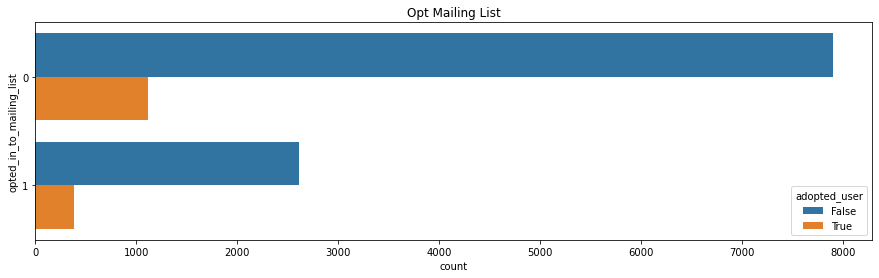

In [19]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="opted_in_to_mailing_list", hue='adopted_user', data=user_df).set_title('Opt Mailing List');

In [20]:
# mailing list doesn't make much difference 

# need to change this to be more effective